In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import os
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.preprocessing import StandardScaler

In [3]:
scanners = [
    'C400A2E19293', # R1824
    'CD4533FFC0E1', # R1836
    'D2B6503554D7', # R1826
    'DB8B36A69C56', # R1840
    'DD697EA75B68', # R1835
    'DF231643E227', # R1830
    'E13B805C6CB0', # R1825
    'E43355CA8B96', # R1833
    'E6D9D20DD197', # R1831
    'E8FD0B453DC4', # R1837
    'E96AF2C858BA', # R1827
    'EC72840D9AD3', # R1823
    'F1307ECB3B90', # R1834
    'F1EDAF28E08A', # R1821
    'F69A86823B96', # R1828
    'FB2EE01C18CE', # R1829
    'FDAE5980F28C'  # R1832
]

In [4]:
rawData = pd.read_csv("../Data/rssi4.csv")
rawData.drop("name", axis=1, inplace=True)

In [5]:
rawData

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
33167,1575601588989000000,0117C55D14E4,V1_28,-60,DD697EA75B68
33168,1575601589061000000,0117C55D14E4,V1_28,-70,D2B6503554D7
33169,1575601589092000000,0117C55D14E4,V1_28,-66,EC72840D9AD3
33170,1575601589210000000,0117C55D14E4,V1_28,-91,E43355CA8B96


In [6]:
B1 = rawData[rawData["beacon"] == "0117C55D14E4"]
B1

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
33167,1575601588989000000,0117C55D14E4,V1_28,-60,DD697EA75B68
33168,1575601589061000000,0117C55D14E4,V1_28,-70,D2B6503554D7
33169,1575601589092000000,0117C55D14E4,V1_28,-66,EC72840D9AD3
33170,1575601589210000000,0117C55D14E4,V1_28,-91,E43355CA8B96


In [7]:
B1 = B1.pivot_table(columns="scanner", values="rssi", index=["time", "location"]).rename_axis(None, axis=1).reset_index()

In [8]:
B1["time"] = pd.to_datetime(B1["time"])
B1

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30166,2019-12-06 03:06:28.989,V1_28,NaN,NaN,NaN,NaN,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30167,2019-12-06 03:06:29.061,V1_28,NaN,NaN,-70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30168,2019-12-06 03:06:29.092,V1_28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-66.0,NaN,NaN,NaN,NaN,NaN
30169,2019-12-06 03:06:29.210,V1_28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pinData = pd.read_csv("../Documents/Pin", sep='\t')
pinData

,Id,X,Y
0,V1_1,10.747900,2.29302
1,V1_10,11.176600,5.29753
2,V1_11,14.063600,5.31235
3,V1_12,17.173201,5.21713
4,V1_13,20.171700,5.12133
5,V1_14,23.169100,5.24792
6,V1_15,26.167101,5.26332
7,V1_16,29.054100,5.27814
8,V1_17,2.278330,8.25413
9,V1_18,6.164600,8.27409


In [10]:
pinDataMap = pinData.set_index("Id").transpose()
toCoor = pinDataMap.to_dict()

In [11]:
B1["X"] = B1["location"].apply(lambda x: toCoor[x]["X"])
B1["Y"] = B1["location"].apply(lambda x: toCoor[x]["Y"])
B1.drop("location", axis=1, inplace=True)

In [12]:
train = B1.sample(frac=0.8, random_state=12345)
test = B1.drop(train.index)

In [13]:
train.sort_values("time", inplace=True)

In [14]:
train.set_index("time", inplace=True)
train = train.groupby(["X", "Y"]).rolling(50, min_periods=1).agg(["mean", "std", "median", "count"])[scanners].reset_index().ffill().fillna(-100)

In [15]:
test.set_index("time", inplace=True)
test = test.groupby(["X", "Y"]).rolling(50, min_periods=1).agg(["mean", "std", "median", "count"])[scanners].reset_index().ffill().fillna(-100)

In [16]:
train.drop("time", axis=1, inplace=True)
test.drop("time", axis=1, inplace=True)

/home/mimos/anaconda3/envs/loc/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [17]:
train.describe()

X             Y  C400A2E19293                              \
                                           mean           std        median   
count  24137.000000  24137.000000  24137.000000  24137.000000  24137.000000   
mean      21.713847      8.587530    -83.814024      2.828900    -83.584890   
std        5.327050      2.671972      6.873098      3.557816      7.283922   
min       14.063600      5.121330   -100.000000   -100.000000   -100.000000   
25%       17.173201      5.312350    -89.000000      0.707107    -89.000000   
50%       23.153700      8.203950    -84.000000      2.121320    -84.000000   
75%       27.133301     11.717700    -79.666667      3.937004    -79.500000   
max       29.689400     12.253700    -66.000000     17.677670    -66.000000   

                     CD4533FFC0E1                                            \
              count          mean           std        median         count   
count  24137.000000  24137.000000  24137.000000  24137.000000  24137.000000   
mean       2.063015    -74.056805      2.757990    -73.699590      3.625016   
std        1.704796      6.264887      2.627086      6.547154      2.026128   
min        0.000000    -96.000000   -100.000000    -96.000000      0.000000   
25%        1.000000    -78.666667      1.000000    -78.000000      2.000000   
50%        2.000000    -74.000000      2.121320    -74.000000      4.000000   
75%        3.000000    -68.666667      4.041452    -67.500000      5.000000   
max       10.000000    -63.750000     14.849242    -64.000000     13.000000   

       ...  F69A86823B96                FB2EE01C18CE                \
       ...        median         count          mean           std   
count  ...  24137.000000  24137.000000  24137.000000  24137.000000   
mean   ...    -73.848718      3.623151    -84.853601      1.887395   
std    ...      8.335787      2.256763      7.469830      7.727826   
min    ...   -100.000000      0.000000   -100.000000   -100.000000   
25%    ...    -80.500000      2.000000    -91.500000      0.707107   
50%    ...    -74.000000      3.000000    -86.000000      1.643168   
75%    ...    -69.000000      5.000000    -78.250000      3.535534   
max    ...    -57.000000     13.000000    -67.000000     18.384776   

                                   FDAE5980F28C                              \
             median         count          mean           std        median   
count  24137.000000  24137.000000  24137.000000  24137.000000  24137.000000   
mean     -84.601504      3.144384    -83.429054      2.716372    -83.241704   
std        7.871354      2.501026      5.885700      3.301213      6.054118   
min     -100.000000      0.000000   -100.000000   -100.000000   -100.000000   
25%      -91.500000      1.000000    -87.500000      0.707107    -87.500000   
50%      -86.000000      3.000000    -84.000000      2.121320    -84.000000   
75%      -77.500000      5.000000    -79.000000      4.163332    -78.500000   
max      -67.000000     14.000000    -70.000000     13.435029    -70.000000   

                     
              count  
count  24137.000000  
mean       2.387496  
std        1.609457  
min        0.000000  
25%        1.000000  
50%        2.000000  
75%        3.000000  
max       10.000000  

[8 rows x 70 columns]

In [18]:
X_train = train[scanners]
y_train = train[["X", "Y"]]

X_test = test[scanners]
y_test = test[["X", "Y"]]

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values

In [20]:
X_train

array([[ -2.35502413, -28.9028524 ,  -2.2536553 , ..., -31.11537958,
         -2.76813971,  -1.48344787],
       [ -2.35502413, -28.9028524 ,  -2.2536553 , ..., -31.11537958,
         -2.76813971,  -1.48344787],
       [ -2.35502413, -28.9028524 ,  -2.2536553 , ..., -31.11537958,
         -2.76813971,  -1.48344787],
       ...,
       [ -1.11829273,   0.1986186 ,  -1.0866774 , ...,  -0.60865712,
         -0.37302598,  -0.24076714],
       [ -1.11829273,   0.1986186 ,  -1.0866774 , ...,  -0.60865712,
         -0.37302598,  -0.24076714],
       [ -1.11829273,   0.1986186 ,  -1.0866774 , ...,  -0.60865712,
         -0.37302598,  -0.24076714]])

In [21]:
y_train

array([[14.0636 ,  5.31235],
       [14.0636 ,  5.31235],
       [14.0636 ,  5.31235],
       ...,
       [29.6894 , 11.286  ],
       [29.6894 , 11.286  ],
       [29.6894 , 11.286  ]])

In [22]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[68]),
    layers.Dense(2, kernel_regularizer=regularizers.l2(1), activity_regularizer=regularizers.l1(1))
])

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2208      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 2,274
Trainable params: 2,274
Non-trainable params: 0
_________________________________________________________________


In [24]:
EPOCHS = 500

checkpoint_path = "../Models/rolling_statistics_nn/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split=0.2, 
                    verbose=1, callbacks=[early_stop, tfdocs.modeling.EpochDots(), cp_callback])

Train on 19309 samples, validate on 4828 samples
Epoch 1/500
18336/19309 [===========================>..] - ETA: 0s - loss: 81.9467 - mae: 5.2931 - mse: 58.7094
Epoch: 0, loss:79.6653,  mae:5.1275,  mse:56.1156,  val_loss:71.7718,  val_mae:4.5521,  val_mse:37.9686,  
19309/19309 [==============================] - 1s 60us/sample - loss: 79.6653 - mae: 5.1275 - mse: 56.1156 - val_loss: 71.7718 - val_mae: 4.5521 - val_mse: 37.9686
Epoch 2/500
19309/19309 [==============================] - 1s 31us/sample - loss: 33.7656 - mae: 1.6653 - mse: 4.7226 - val_loss: 55.7496 - val_mae: 3.4897 - val_mse: 21.4320
Epoch 3/500
19309/19309 [==============================] - 1s 30us/sample - loss: 31.2203 - mae: 1.4084 - mse: 3.1425 - val_loss: 51.8174 - val_mae: 3.2727 - val_mse: 17.8755
Epoch 4/500
19309/19309 [==============================] - 1s 31us/sample - loss: 30.1478 - mae: 1.3040 - mse: 2.5842 - val_loss: 48.3206 - val_mae: 2.7741 - val_mse: 13.5450
Epoch 5/500
19309/19309 [==================

19309/19309 [==============================] - 1s 31us/sample - loss: 27.5492 - mae: 1.0163 - mse: 1.1801 - val_loss: 41.8111 - val_mae: 2.1712 - val_mse: 7.2926
Epoch 47/500
19309/19309 [==============================] - 1s 44us/sample - loss: 27.5446 - mae: 1.0156 - mse: 1.1773 - val_loss: 41.5251 - val_mae: 2.3178 - val_mse: 7.2479
Epoch 48/500
19309/19309 [==============================] - 1s 34us/sample - loss: 27.5412 - mae: 1.0156 - mse: 1.1762 - val_loss: 41.8478 - val_mae: 2.3599 - val_mse: 7.7916
Epoch 49/500
19309/19309 [==============================] - 1s 35us/sample - loss: 27.5364 - mae: 1.0150 - mse: 1.1730 - val_loss: 41.7721 - val_mae: 2.2194 - val_mse: 7.3835
Epoch 50/500
19309/19309 [==============================] - 1s 42us/sample - loss: 27.5328 - mae: 1.0146 - mse: 1.1707 - val_loss: 41.3644 - val_mae: 2.2137 - val_mse: 6.9194
Epoch 51/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.5295 - mae: 1.0146 - mse: 1.1698 - val_loss: 41.2787

Epoch 93/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4525 - mae: 1.0081 - mse: 1.1273 - val_loss: 42.3837 - val_mae: 2.6325 - val_mse: 9.0426
Epoch 94/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4522 - mae: 1.0087 - mse: 1.1279 - val_loss: 42.0496 - val_mae: 2.4159 - val_mse: 8.2153
Epoch 95/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4505 - mae: 1.0082 - mse: 1.1263 - val_loss: 41.1987 - val_mae: 2.2403 - val_mse: 6.9228
Epoch 96/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4499 - mae: 1.0080 - mse: 1.1258 - val_loss: 41.7740 - val_mae: 2.3423 - val_mse: 7.7783
Epoch 97/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4486 - mae: 1.0086 - mse: 1.1259 - val_loss: 41.0916 - val_mae: 2.1922 - val_mse: 6.7300
Epoch 98/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4470 - mae: 1.0076 - mse: 1.1235 - val_

19309/19309 [==============================] - 1s 30us/sample - loss: 27.4237 - mae: 1.0059 - mse: 1.1120 - val_loss: 42.0788 - val_mae: 2.6073 - val_mse: 8.6811
Epoch 139/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4237 - mae: 1.0061 - mse: 1.1122 - val_loss: 40.7542 - val_mae: 2.1537 - val_mse: 6.3016
Epoch 140/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4227 - mae: 1.0056 - mse: 1.1108 - val_loss: 40.9387 - val_mae: 2.2172 - val_mse: 6.6001
Epoch 141/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4230 - mae: 1.0062 - mse: 1.1123 - val_loss: 41.4988 - val_mae: 2.4204 - val_mse: 7.6834
Epoch 142/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.4222 - mae: 1.0056 - mse: 1.1107 - val_loss: 41.3785 - val_mae: 2.3914 - val_mse: 7.4401
Epoch 143/500
19309/19309 [==============================] - 1s 29us/sample - loss: 27.4210 - mae: 1.0056 - mse: 1.1100 - val_loss: 41

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
154,27.418590,1.005457,1.109652,41.769099,2.458067,8.052988,154
155,27.417272,1.005458,1.108936,40.784295,2.130895,6.244481,155
156,27.415905,1.005483,1.108038,40.867720,2.188473,6.511720,156
157,27.417040,1.005196,1.108701,41.454960,2.420072,7.527823,157
158,27.416323,1.005026,1.107703,40.396573,1.942821,5.412976,158


Text(0, 0.5, 'MAE')

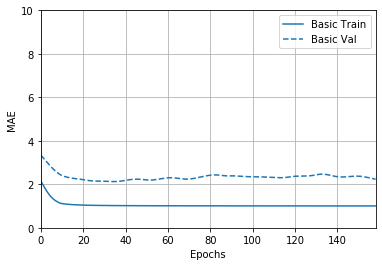

In [26]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

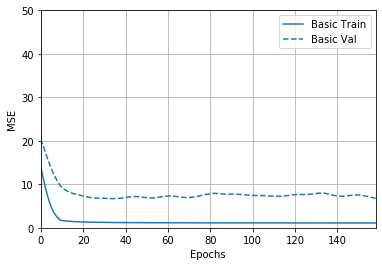

In [27]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 50])
plt.ylabel('MSE')

In [28]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Loss: {}".format(loss))
print("Mean absolute error: {}".format(mae))
print("Mean squared error: {}".format(mse))

6034/1 - 0s - loss: 36.2406 - mae: 1.0974 - mse: 2.1162
Loss: 30.637618564634796
Mean absolute error: 1.0974079370498657
Mean squared error: 2.116208553314209


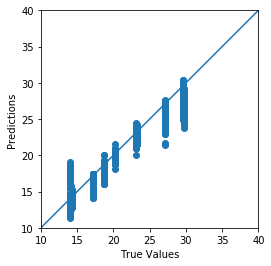

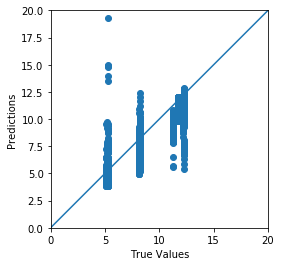

In [29]:
y_pred = model.predict(X_test).flatten().reshape((-1, 2))

a = plt.axes(aspect='equal')
plt.scatter(y_test[:, 0], y_pred[:, 0])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [10, 40]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test[:, 1], y_pred[:, 1])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [30]:
joblib.dump(scaler, "../Models/rolling_statistics_nn/scaler")

['../Models/rolling_statistics_nn/scaler']